# 1. Поднимем pip и установим все зависимости

In [ ]:
# 1) Сборка последней версии transformers из исходников:
!pip install --upgrade pip
!pip install git+https://github.com/huggingface/transformers accelerate
# 2) Утилиты для VL:
!pip install qwen-vl-utils[decord]==0.0.8

# Install missing dependency
!pip install gekko

# 3) Наш пакет и зависимости:
%cd /content/drive/MyDrive/СБЕР/RESEACH/Control_Edit_Gen_Image/ranger_generation
!pip install -e . \
    --no-deps \
    transformers sentencepiece auto-gptq peft accelerate huggingface-hub \
    diffusers safetensors tqdm pillow qwen-vl-utils



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2


# 2. Подключаем диск и проект в sys.path

In [ ]:
import sys
proj = '/content/drive/MyDrive/СБЕР/RESEACH/Control_Edit_Gen_Image/ranger_generation'
if proj not in sys.path:
    sys.path.append(proj)


Тестовые челоыечески промпты

- «Сберкот анфас в тёплом золотом свете на закате»
- «Портрет девушки анфас в киновизуальном стиле на фоне городского пейзажа»
- «Кошка-астронавт крупным планом при мягком золотом освещении»
- “A front-view portrait of a vintage car in cinematic color grading during golden hour”
- “Sbercat mascot standing center frame under backlit warm sunlight, photorealistic style”

# Flux

In [ ]:
# в Colab-ячейке
!pip install huggingface_hub --quiet
!huggingface-cli login --token ###########


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
The token `Colab reaad` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `Colab reaad`


2025-07-10 10:35:57.531766: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-10 10:35:57.549261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752143757.570932    5756 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752143757.577511    5756 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-10 10:35:57.599196: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

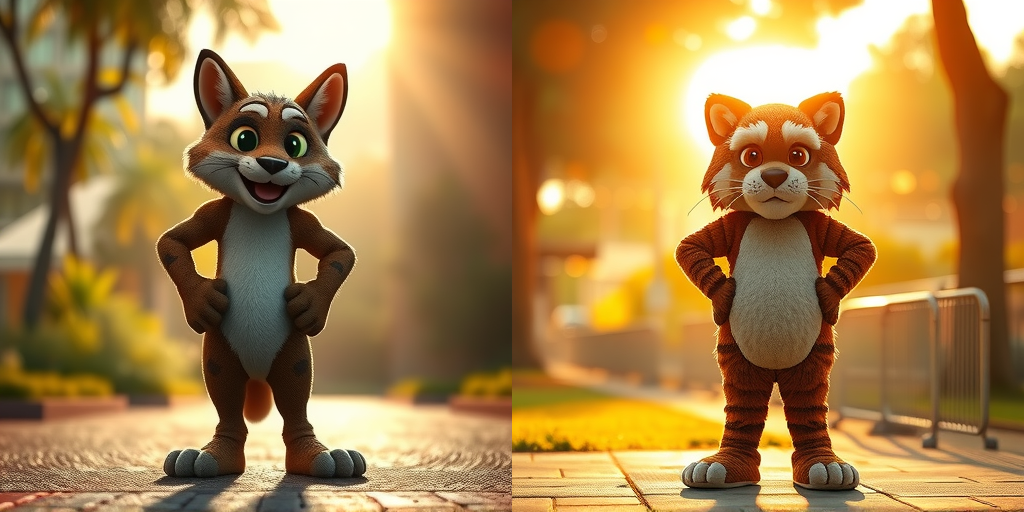

In [ ]:
!python3 scripts/demo_flux.py \
  "Sbercat mascot standing center frame under backlit warm sunlight, photorealistic style" \
  -n 2 -W 512 -H 512 -s 10 -g 7.5 \
  --seeds 222,333 \
  -o "./test_gen/out_demo_flux.png"

from IPython.display import Image, display
display(Image("./test_gen/out_demo_flux.png"))

## use_qwen

2025-07-10 10:39:43.586895: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-10 10:39:43.604151: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752143983.625536    6791 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752143983.632101    6791 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-10 10:39:43.653322: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

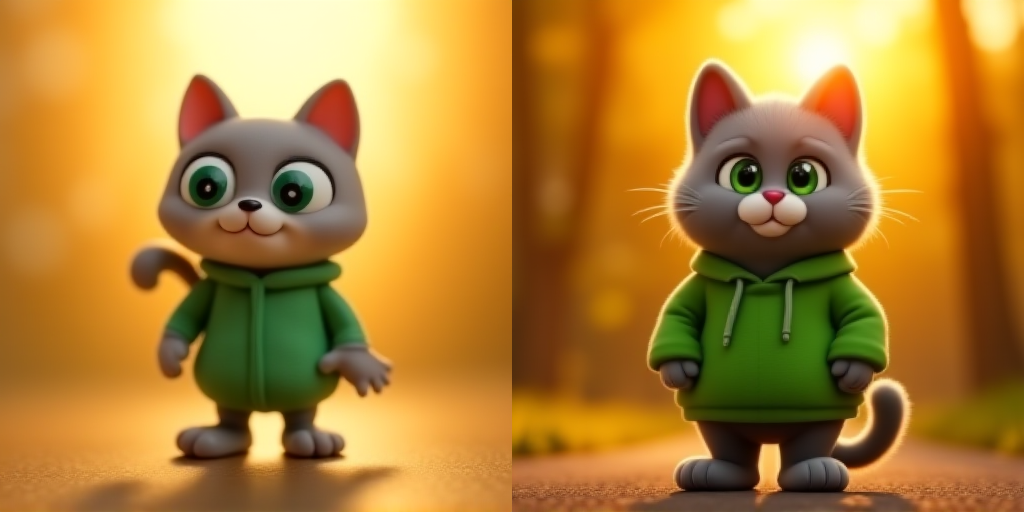

In [ ]:
# Qwen + Flux without negative:
!python3 scripts/demo_qwen_flux.py \
  "Sbercat mascot standing center frame under backlit warm sunlight, photorealistic style" \
  --use_qwen \
  -n 2 -W 512 -H 512 -s 10 -g 7.5 \
  --seeds 222,333 \
  -o "./test_gen/out_qwen_flux.png"


from IPython.display import Image, display
display(Image("./test_gen/out_qwen_flux.png"))

## use_qwen & use_negative

2025-07-10 10:44:10.131472: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-10 10:44:10.148720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752144250.170744    7981 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752144250.177441    7981 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-10 10:44:10.198805: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

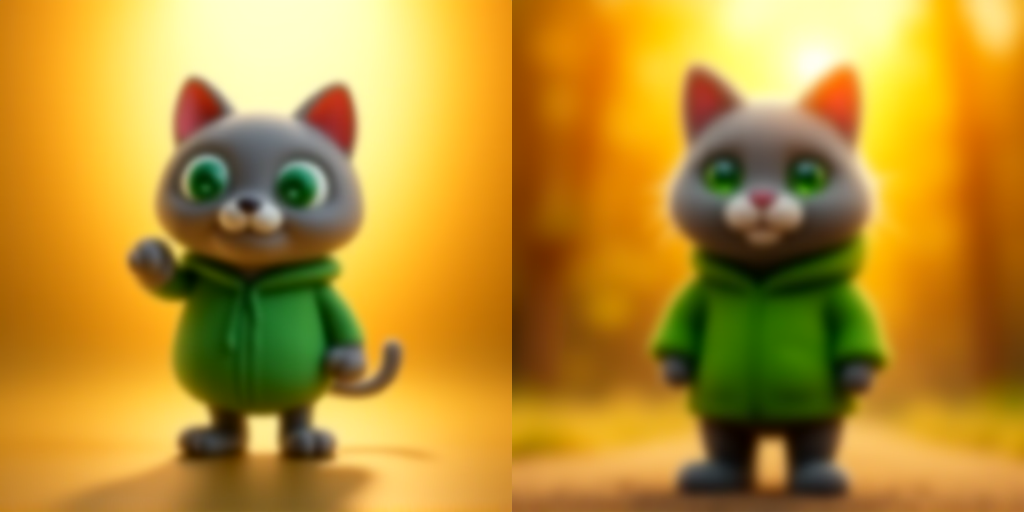

In [ ]:
# Qwen + Flux without negative:
!python3 scripts/demo_qwen_flux.py \
  "Sbercat mascot standing center frame under backlit warm sunlight, photorealistic style" \
  --use_qwen --use_negative \
  -n 2 -W 512 -H 512 -s 10 -g 7.5 \
  --seeds 222,333 \
  -o "./test_gen/out_qwen_flux_with_neg.png"


from IPython.display import Image, display
display(Image("./test_gen/out_qwen_flux_with_neg.png"))